In [120]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# Artists data

In [86]:
artists_df = pd.read_csv("./data/artists-data.csv", index_col="Artist")

Show general information for the dataframe

In [87]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4168 entries, Ivete Sangalo to Johnny Clegg
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Genres      4163 non-null   object 
 1   Songs       4167 non-null   float64
 2   Popularity  4166 non-null   float64
 3   Link        4167 non-null   object 
dtypes: float64(2), object(2)
memory usage: 162.8+ KB


In [88]:
artists_df.describe(include='all')

,Genres,Songs,Popularity,Link
count,4163,4167.000000,4166.000000,4167
unique,1750,NaN,NaN,4167
top,Gospel/Religioso,NaN,NaN,/ivete-sangalo/
freq,244,NaN,NaN,1
mean,NaN,91.021358,1.831325,NaN
std,NaN,96.655819,8.036739,NaN
min,NaN,0.000000,0.000000,NaN
25%,NaN,26.000000,0.000000,NaN
50%,NaN,64.000000,0.000000,NaN
75%,NaN,123.000000,1.000000,NaN


In [89]:
artists_df.head(3)

,Genres,Songs,Popularity,Link
Artist,,,,
Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/


In [90]:
artists_df.tail(3)

,Genres,Songs,Popularity,Link
Artist,,,,
Amadou & Mariam,World Music,14.0,0.0,/amadou-mariam/
Magic System,World Music; Gospel/Religioso,16.0,0.0,/magic-system/
Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/


In [91]:
# Check for redundancy in first 100 rows (regardings artists)
num_listed_artists = 100
artists = artists_df.index.sort_values().tolist()
for idx, artist in enumerate(artists):
    if idx == num_listed_artists:
        break
    print(artist)

$ifra
*NSYNC
+44
10 Things I Hate About You
10000 Maniacs
10cc
12 Stones
12012
13th Floor Elevators
14 Bis
2 Am
2 Chainz
21 Savage
220 Band
24K
2NE1
3 Doors Down
3030
311
36 Crazyfists
3OH!3
4 Non Blondes
4minute
4x1
5 Seconds Of Summer
50 Cent
509-e
5º Elemento
6 Da Manhã
90sFlav
97
A Banda Mais Bonita da Cidade
A Bronkka
A Casa Amarela
A Culpa é das Estrelas
A Day To Remember
A Família
A Favorita (novela)
A Feia Mais Bela
A Filha do Coroa
A Flock of Seagulls
A Knight's Tale (Coração de Cavaleiro)
A Princesa e O Sapo
A Tribe Called Quest
A..R. Rahman
A.C.S.E.S.M. Camisa Verde e Branco
A286
ABBA
AC/DC
AFI
AKEEM Music
ATB
AVICII
Aaliyah
Aaron Neville
Abbey Lincoln
Abel & Caim
Aborto Elétrico
Above & Beyond
Abril
Acadêmicos do Tucuruvi
Accept
Ace Hood
Adair Cardoso
Adalberto & Adriano
Adam Lambert
Adele
Adhemar de Campos
Adilson Silva
Adoniran Barbosa
Adoração & Adoradores
Adrian Suirady
Adriana (romântica)
Adriana Arydes
Adriana Calcanhotto
Adriana Marques
Adriana Partimpim
Adrielle Lop

Check for artists redundancy

In [92]:
# Save all artists to check for artist redundancy
artists = artists_df.index.sort_values().tolist()
with open('artists.txt', 'w') as f:
    for artist in artists:
        f.write(f"{str(artist)}\n")

In [93]:
# Check for uniqueness of the artists
artists_df = pd.read_csv("./data/artists-data.csv")
print(artists_df.groupby("Artist")["Artist"].count().sort_values(ascending=False))
artists_df = pd.read_csv("./data/artists-data.csv", index_col="Artist")

Artist
$ifra                    1
Nevilton                 1
New Kids On The Block    1
New Model Army           1
New Order                1
                        ..
Funeral For A Friend     1
Funk U                   1
Funkadelic               1
Furacão 2000             1
≛NXT≛                    1
Name: Artist, Length: 4167, dtype: int64


In [94]:
# Print all 79 genres
all_unique_genres_concatenated = artists_df.sort_values(by="Genres")["Genres"].unique()
all_genres = []
for concatenated_genres in all_unique_genres_concatenated:
    # Split genres of artist that have multiple genres assigned to them
    if isinstance(concatenated_genres, str):
        all_genres += concatenated_genres.split("; ")
all_unique_genres = list(set(all_genres))
num_genres = len(all_unique_genres)
print(f"In total {num_genres} genres.")
sorted_unique_genres = sorted(all_unique_genres)
for genre in sorted_unique_genres:
    print(genre)

In total 79 genres.
Axé
Black Music
Blues
Bossa Nova
COLETÂNEA
Chillout
Classic Rock
Clássico
Country
Dance
Disco
Electro Swing
Electronica
Emocore
Fado
Folk
Forró
Funk
Funk Carioca
Gospel/Religioso
Grunge
Gótico
Hard Rock
Hardcore
Heavy Metal
Hip Hop
House
Indie
Industrial
Infantil
Instrumental
J-Pop/J-Rock
Jazz
Jovem Guarda
K-Pop/K-Rock
Kizomba
Lo-fi
MPB
Metal
Músicas Gaúchas
New Age
New Wave
Pagode
Piano Rock
Piseiro
Pop
Pop/Punk
Pop/Rock
Post-Rock
Power-Pop
Progressivo
Psicodelia
Punk Rock
Pós-Punk
R&B
Rap
Reggae
Reggaeton
Regional
Rock
Rock Alternativo
Rockabilly
Romântico
Samba
Samba Enredo
Sertanejo
Ska
Soft Rock
Soul Music
Surf Music
Tecnopop
Trance
Trap
Trilha Sonora
Trip-Hop
Tropical House
Urban
Velha Guarda
World Music


Show more specific information (e.g., list all count most popular artists, ...)

<AxesSubplot:xlabel='Genres'>

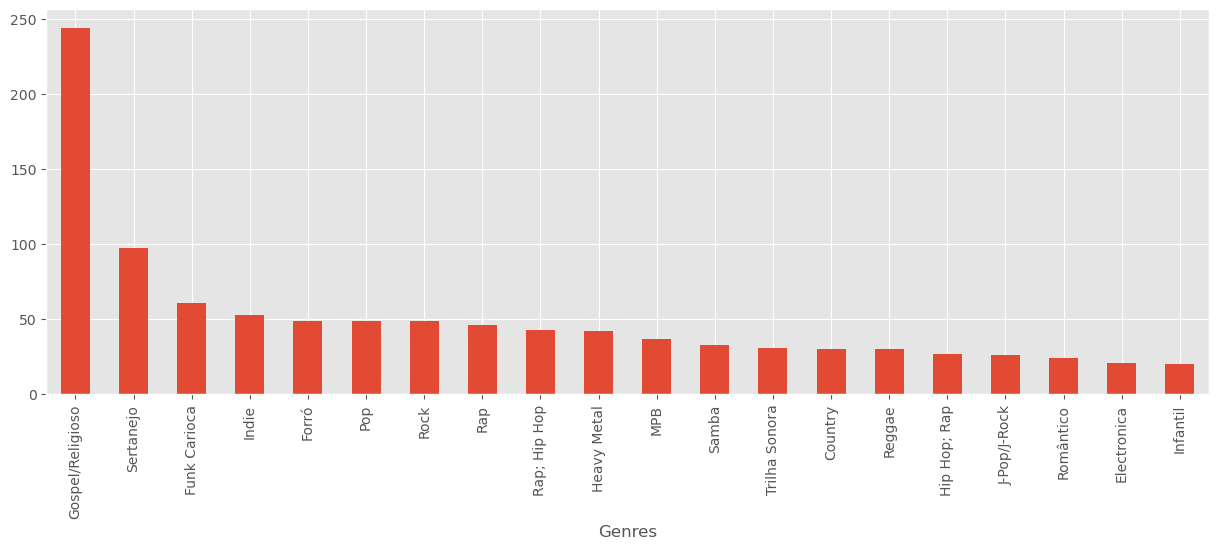

In [95]:
# Count how many artist per genre
artists_df.groupby("Genres")["Genres"].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='Artist'>

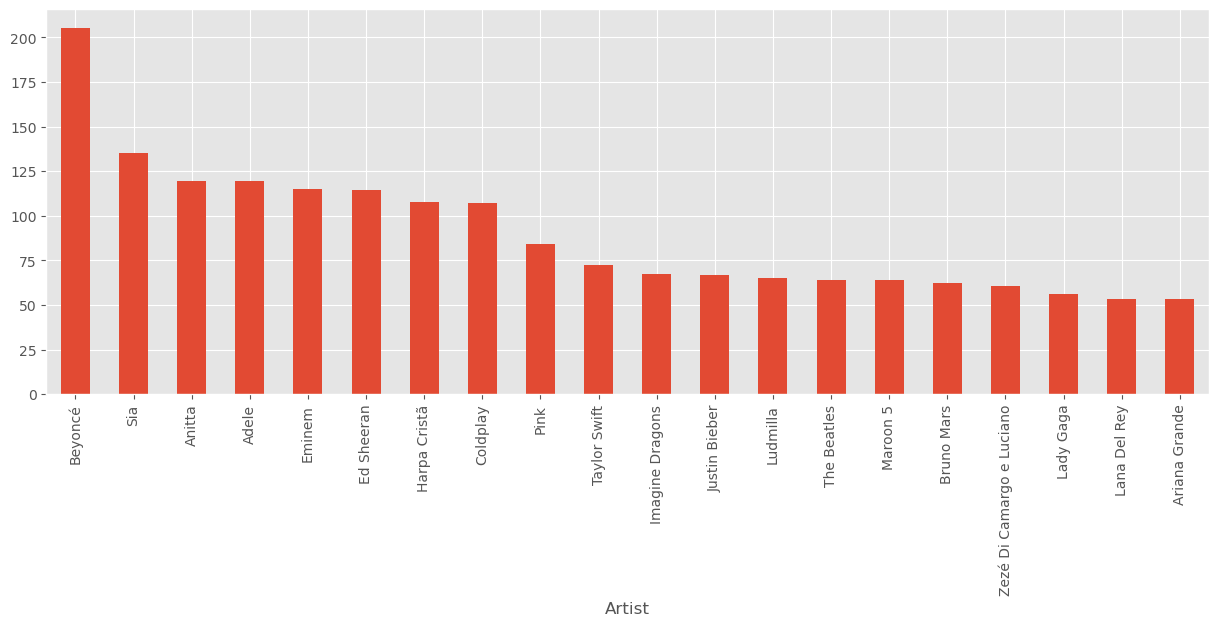

In [96]:
# Rank the artists regarding their popularity
artists_df.sort_values(by="Popularity", ascending=False)["Popularity"].head(20).plot(kind='bar')

<AxesSubplot:xlabel='Artist'>

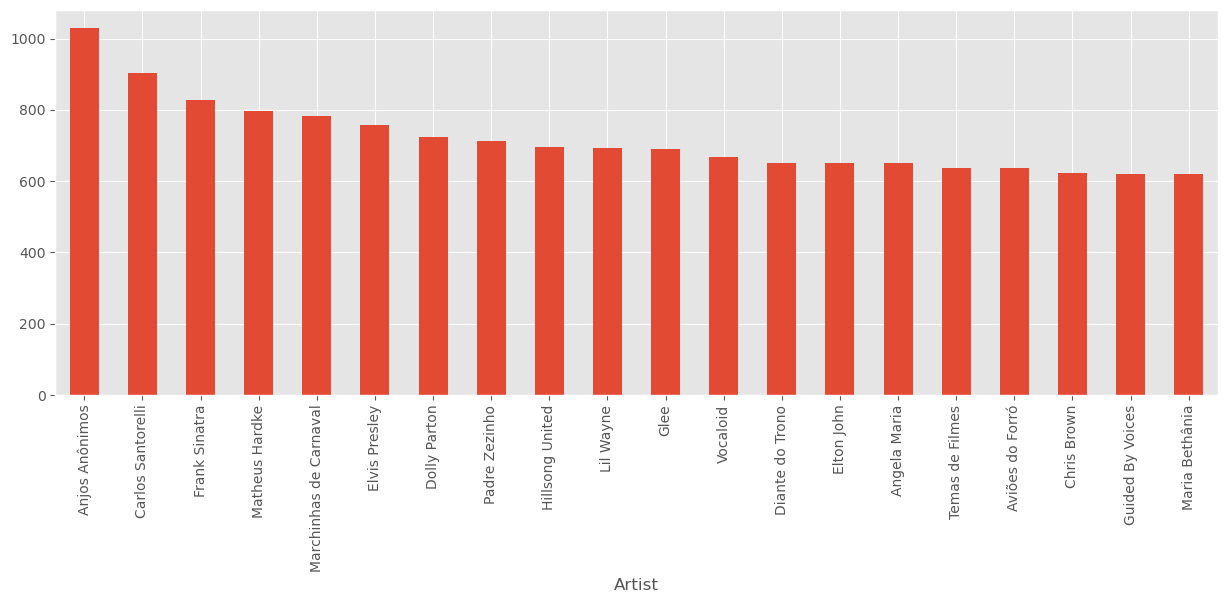

In [97]:
# Rank the artists regarding their number of songs
artists_df.sort_values(by="Songs", ascending=False)["Songs"].head(20).plot(kind='bar')

# Lyrics data

In [98]:
lyrics_df = pd.read_csv("data/lyrics-data.csv")

Show general information for the dataframe

In [99]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB


In [100]:
lyrics_df.describe(include='all')

,ALink,SName,SLink,Lyric,language
count,379930,379928,379930,379854,365296
unique,4238,267258,379892,371181,52
top,/anjos-anonimos/,Intro,/joan-baez/aint-gonna-let-nobody-turn-me-aroun...,Instrumental,en
freq,1029,116,2,2087,191814


In [101]:
lyrics_df.head(3)

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt


In [102]:
lyrics_df.tail(3)

,ALink,SName,SLink,Lyric,language
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en
379930,/clegg-johnny/,Woman Be My Country,/clegg-johnny/woman-be-my-country.html,Here we stand on the edge of the day\nFaces me...,en


Language distribution of all songs

In [103]:
# Show language distribution of all songs
lyrics_df.groupby("language")["language"].count().sort_values(ascending=False).head(10)

language
en    191814
pt    157393
es      9917
rw      1679
it      1432
fr      1225
de       844
fi       145
sv       112
ro        97
Name: language, dtype: int64

Check for instrumental songs

In [104]:
# Check for variations in instrumental lyrics (description)
lyrics_df.groupby("Lyric")["Lyric"].count().sort_values(ascending=False).head(7)

Lyric
Instrumental      2087
(Instrumental)     489
instrumental       387
[Instrumental]     247
(instrumental)      92
[instrumental]      70
Intrumental         54
Name: Lyric, dtype: int64

In [105]:
# Get absolute and relative number of instrumental songs

# Create instrumental lyric filter 
lyrcis_list = lyrics_df["Lyric"]
is_instrumental_lyric_filter = []
for lyric in lyrcis_list:
    if "instrumental" in str(lyric).lower():
        is_instrumental_lyric_filter.append(True)
    else:
        is_instrumental_lyric_filter.append(False)

# Apply filter with various forms of instrumentals lyrics (description) to compute the number of instrumental songs
num_instrumentals_abs = lyrics_df[is_instrumental_lyric_filter].count()["ALink"]
num_songs = lyrics_df.count()["ALink"]
num_instrumentals_rel = num_instrumentals_abs/num_songs
print(f"From all {num_songs} songs, are {num_instrumentals_rel*100}% (in total: {num_instrumentals_abs}) of them instrumental songs.")

From all 379930 songs, are 1.3231384728765827% (in total: 5027) of them instrumental songs.


Song redundancy

In [106]:
# Check for song redundancy
lyrics_df.groupby("Lyric")["Lyric"].count().sort_values(ascending=False).head(20)

Lyric
Instrumental                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [107]:
# Check appearance of one reoccurring lyrics
lyrics_df[lyrics_df["Lyric"] == "Shortcut to part of Donovan Leitch Lyrics\nDonovan Leitch - Half Moon Bay Lyrics\nDonovan Leitch - Hampstead Incident Lyrics\nDonovan Leitch - Happiness Runs Lyrics\nDonovan Leitch - Harmony Lyrics\nDonovan Leitch - Henry Martin Lyrics\nDonovan Leitch - Hey Gyp (Dig the Slowness) Lyrics\nDonovan Leitch - Hi It's Been a Long Time Lyrics\nDonovan Leitch - High Your Love Lyrics\nDonovan Leitch - Homesickness Lyrics\nDonovan Leitch - House of Jansch Lyrics\nDonovan Leitch - How Silly Lyrics\nDonovan Leitch - Hurdy Gurdy Man Lyrics\nDonovan Leitch - I Like You Lyrics\nDonovan Leitch - I Love My Shirt Lyrics\nDonovan Leitch - I Love you Baby Lyrics\nDonovan Leitch - In an Old-Fashioned Picture Book Lyrics\nDonovan Leitch - International Man Lyrics\nDonovan Leitch - Isle of Islay Lyrics\nDonovan Leitch - Jabberwocky Lyrics\nDonovan Leitch - Jennifer Juniper Lyrics\nDonovan Leitch - Jersey Thursday Lyrics\nDonovan Leitch - Joe Bean's Theme Lyrics\nDonovan Leitch - Johnny Tuff Lyrics\nDonovan Leitch - Josie Lyrics\nDonovan Leitch - Kalifornia Kiddies Lyrics\nDonovan Leitch - Keep on Truckin' Lyrics\nDonovan Leitch - La Moora Lyrics\nDonovan Leitch - Lady of the Flowers Lyrics\nDonovan Leitch - Lady of the Lamp Lyrics\nDonovan Leitch - Lady of the Stars Lyrics\nDonovan Leitch - Lay Down Lassie Lyrics\nDonovan Leitch - Lay of the Last Tinker Lyrics\nDonovan Leitch - Lazy Daze Lyrics\nDonovan Leitch - Legend of a Girl Child Linda Lyrics\nDonovan Leitch - Liberation Rag Lyrics\nDonovan Leitch - Life Goes On Lyrics\nDonovan Leitch - Life Is a Merry-Go-Round Lyrics\nDonovan Leitch - Little Ben Lyrics\nDonovan Leitch - Little Boy in Corduroy Lyrics\nDonovan Leitch - Little Tin Soldier Lyrics\nDonovan Leitch - Living for the Love Light Lyrics\nDonovan Leitch - Living For the Love Light in Your Eyes Lyrics\nDonovan Leitch - Local Boy Chops Wood Lyrics\nDonovan Leitch - Lord of the Dance Lyrics\nDonovan Leitch - Lord of the Reedy River Lyrics\nDonovan Leitch - Lost Time Lyrics\nDonovan Leitch - Love is Only Feeling Lyrics\nDonovan Leitch - Love of My Life Lyrics\nDonovan Leitch - Lover O Lover Lyrics\nDonovan Leitch - Mad John's Escape Lyrics\nDonovan Leitch - Madrigalinda Lyrics\nDonovan Leitch - Maria Magenta Lyrics\nDonovan Leitch - Marjorie Margerine Lyrics\nDonovan Leitch - Maya's Dance Lyrics\nDonovan Leitch - Mee Mee I Love You Lyrics\nDonovan Leitch - Mellow Yellow Lyrics\nDonovan Leitch - Moon Rock Lyrics\nDonovan Leitch - Mr. Wind Lyrics\nDonovan Leitch - Museum Lyrics\nDonovan Leitch - My Love Is True Lyrics\nFull Donovan Leitch Lyrics...\n\n\n"]

,ALink,SName,SLink,Lyric,language
287915,/donovan/,Curry Land,/donovan/curry-land.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
287916,/donovan/,Cuttin' Out,/donovan/cuttin-out.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
287934,/donovan/,Forever Your Love,/donovan/forever-your-love.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
287949,/donovan/,Homesickness,/donovan/homesickness.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
287965,/donovan/,Keep on Truckin',/donovan/keep-on-truckin.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
...,...,...,...,...,...
288043,/donovan/,Shipwreck,/donovan/shipwreck.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
288118,/donovan/,Till I See You Again,/donovan/till-i-see-you-again.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
288142,/donovan/,Yellow Star,/donovan/yellow-star.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en
288143,/donovan/,You do Belong (Teenage Suicide),/donovan/you-do-belong-teenage-suicide.html,Shortcut to part of Donovan Leitch Lyrics\nDon...,en


In [108]:
# Check for redundant songs for feature songs (e.g., in eminem songs)
pd.set_option('display.max_rows', None)
# Get the Alink for Eminem
eminem_alink = artists_df[artists_df.index == "Eminem"]["Link"][0]
# Print all rows of Eminem songs
print(lyrics_df[lyrics_df["ALink"] == eminem_alink]["SName"])
pd.set_option('display.max_rows', 15)

171247                                        Lose Yourself
171248                                  The Real Slim Shady
171249                                              Rap God
171250                                           Without Me
171251                                    Stan (feat. Dido)
171252                                                Venom
171253                                           Not Afraid
171254                 Love The Way You Lie (feat. Rihanna)
171255                          Godzilla (Feat. Juice WRLD)
171256                    Till I Collapse (feat. Nate Dogg)
171257                              8 Mile Tree Last Battle
171258                                          Mockingbird
171259                            Superman (feat. Dina Rae)
171260                                            Beautiful
171261                                           My Name Is
171262                               Cleanin' Out My Closet
171263                                  

In [109]:
# Check for the song "The Monster" under featuring artist Rihanna
pd.set_option('display.max_rows', None)
# Get the Alink for Rihanna
rihanna_alink = artists_df[artists_df.index == "Rihanna"]["Link"][0]
# Print all rows of Rihanna songs
print(lyrics_df[lyrics_df["ALink"] == rihanna_alink]["SName"])
pd.set_option('display.max_rows', 15)

5155                                    Love On The Brain
5156                               Umbrella (feat. Jay Z)
5157                                             Diamonds
5158                              Stay (feat. Mikky Ekko)
5159                             Only Girl (In The World)
5160                  We Found Love (feat. Calvin Harris)
5161                                            Needed Me
5162                                           Take A Bow
5163                                 Don't Stop The Music
5164                                          The Monster
5165                                             Man Down
5166                                   Work (Feat. Drake)
5167                                               Te Amo
5168                                                  S&M
5169                           Bitch Better Have My Money
5170                                 Love The Way You Lie
5171                                       Kiss It Better
5172          

In [127]:
# Get the lyrics for the song "The Monster" saved under the artist Eminem
eminem_lyric_the_moster = lyrics_df[(lyrics_df["ALink"] == eminem_alink) & (lyrics_df["SName"] == "The Monster (Feat. Rihanna)")]["Lyric"].values[0]
# Print lyrics + number of characters
print(eminem_lyric_the_moster)
print(len(eminem_lyric_the_moster))

Rihanna

I'm friends with the monster
that's under my bed
Get a long with the voices inside of my head
You trying to save me
Stop holding your breath
And you think I'm crazy
yeah, you think I'm crazy

Eminem

I wanted the fame
but not the cover of Newsweek
Oh well, guess beggars can't be choosey
Wanted to receive attention for my music
Wanted to be left alone in public, excuse me
Been wanting my cake, and eat it too
And wanting it both ways
Fame made me a balloon
cause my ego inflated
When I blew; see, it was confusing
Cause all I wanted to do is
Be the Bruce Lee of loose leaf
Abused ink, used it as a tool
When I blew steam (wooh!)
Hit the lottery, oh wee
With what I gave up to get was bittersweet
With this like winning a huge meet
Ironic cause I think I'm getting so huge
I need a shrink
I'm beginning to lose sleep
One sheep, two sheep
Going cuckoo and cooky as Kool Keith
But I'm actually weirder than you think
Cause I'm

Rihanna

I'm friends with the monster that's under my bed
Get a 

In [126]:
# Get the lyrics for the song "The Monster" saved under the artist Rihanna
rihanna_lyric_the_monster = lyrics_df[(lyrics_df["ALink"] == rihanna_alink) & (lyrics_df["SName"] == "The Monster")]["Lyric"].values[0]
# Print lyrics + number of characters
print(rihanna_lyric_the_monster)
print(len(rihanna_lyric_the_monster))

[Hook: Rihanna]
I'm friends with the monster that's under my bed
Get along with the voices inside of my head
You trying to save me, stop holding your breath
And you think I'm crazy, yeah, you think I'm crazy

[Verse 1: Eminem]
I wanted the fame, but not the cover of Newsweek
Oh well, guess beggers can't be choosey
Wanted to receive attention for my music
Wanted to be left alone, public excuse me
Been wanting my cake, and eat it too
for wanting it both ways
Fame made me a balloon cause my ego inflated
When I blew seep it was confusing
Cause all I wanted to do is be the Bruce Lee of loose leaf
Abused ink, used it as a tool when I blew steam, wooh
Hit the lottery, oh wee
With what I gave up to get was bittersweet
It was like winning a huge meet
Ironic cause I think I'm getting so huge I need a shrink
I'm beginning to lose sleep: one sheep, two sheep
Going cucko and cooky as Kool Keith
But I'm actually weirder than you think
Cause I'm

[Hook]
Well, that's not fair
Well, that's not fair

[V

In [125]:
# Compare the sequence ratio between the same song "The Monster (feat. Rihanna)" once saved under Eminem and once under Rihanna
SequenceMatcher(None, eminem_lyric_the_moster, rihanna_lyric_the_monster).ratio()

0.16566898560103543

In [111]:
# Check for actual one word songs
lyrics_df[lyrics_df["SName"] == "Tequila"]

,ALink,SName,SLink,Lyric,language
36845,/dan-shay/,Tequila,/dan-shay/tequila.html,I can still shut down a party\nI can hang with...,en
39597,/brooks-dunn/,Tequila,/brooks-dunn/tequila.html,"One shot, Two shot, Three tequila floor,\nCowb...",en
75465,/korpiklaani/,Tequila,/korpiklaani/tequila.html,"Miesten mieli maailmalle,\nPoluil tietämättömi...",fi
280808,/juanes/,Tequila,/juanes/tequila.html,Quedamos en nunca volver a hablar\nSé que no d...,es
309131,/nicky-jam/,Tequila,/nicky-jam/tequila.html,Está cansada de la vida (Vida)\nBusco refugio ...,es
